# Evaluation Project 10
Agriculture Dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the file from csv into a dataframe
ds=pd.read_csv('train_agriculture.csv')
ds

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


We have a dataset based on crops harvested by various farmers at the end of harvest season. Our aim is to develop a model to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.


In [3]:
#lets check the columns
ds.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

### Column Description:-

1. ID - UniqueID
2. Estimated_Insects_Count - Estimated insects count per square meter
3. Crop_Type - Category of Crop(0,1)
4. Soil_Type - Category of Soil(0,1)
5. Pesticide_Use_Category - Type of pesticides uses(1-Never,2-Previously used,3-Currently using)
6. Number_Doses_Week - Number of doses per week
7. Number_Weeks_Used - Number of weeks used
8. Number_Weeks_Quit - Number of weeks quit
9. Season - Season Category(1,2,3)
10. Crop_Damage - Crop Damage Category(0=alive,1=Damage due to other causes,2=Damage due to pesticides)

In [4]:
#lets check the datatypes
ds.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [5]:
#lets check for any missing values
ds.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [6]:
#lets check the distinct values of Number_Weeks_Used
ds['Number_Weeks_Used'].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65.])

In [7]:
#lets fill the missing datas with most frequent value
ds['Number_Weeks_Used'].replace(np.nan,ds['Number_Weeks_Used'].mode()[0],inplace=True)

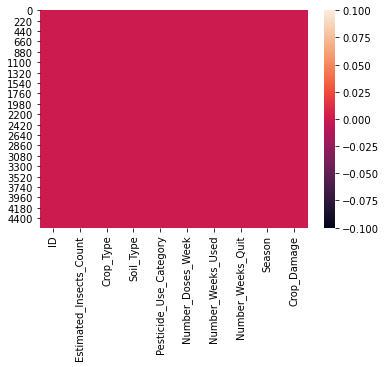

In [8]:
#again check for missing data
sns.heatmap(ds.isnull())

In [9]:
#lets check the summary statistics
ds.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.036530,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.249436,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,26.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


### Inference
1. The Mean is greater than median for all columns except Season,hence we can see a little bit of positive skewness in them.
2. The minimum insects count is 150 and the maximum is 4097.
3. There is high standard deviation for Number weeks quit.
4. we can see a difference gap between the 75th percentile and max value of insect counts. So there is a chance that it may have outlier datas. 

In [10]:
#lets find the correlation
ds.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.422254,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.001181,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093058,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.357684,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099563,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.422254,-0.001181,-0.093058,0.357684,0.099563,1.000000,-0.429923,-0.012550,0.222360
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.429923,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.012550,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.222360,-0.152918,-0.016196,1.000000


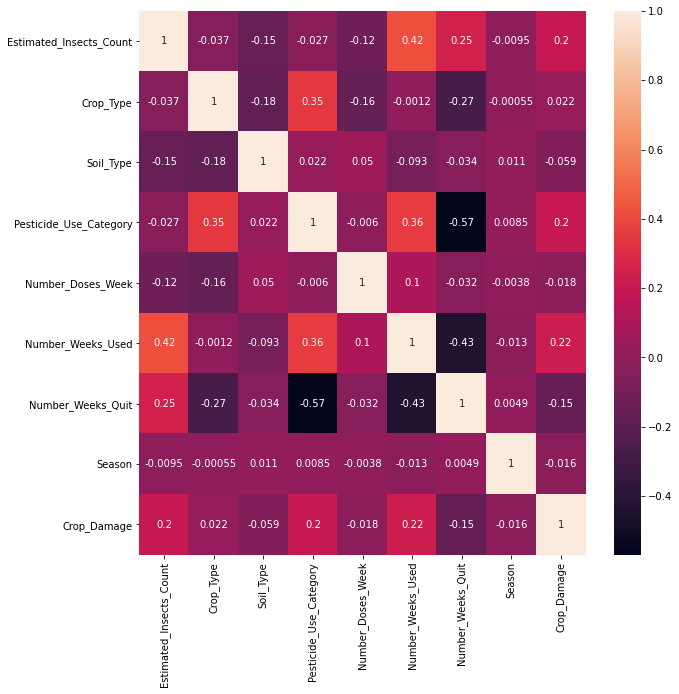

In [11]:
#lets visyualize correlation graphicallly
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(),annot=True)
plt.show()

Our Target variable is showing negative correlation with crop type,soil type,number doses week,number weeks quit and season. That is,these are the factors which shows higher dependancies for the crop to be wealthy.
The factors estimated insects counts,pesticide use category and number weeks used shows positive correlation, As if these factors increases the damage of crops also increases. 

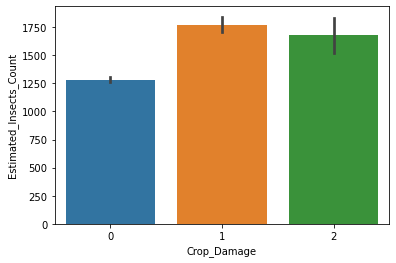

Crop_Damage
0    1282.352094
1    1772.251506
2    1678.947826
Name: Estimated_Insects_Count, dtype: float64


In [12]:
#lets check the damage type of crop with insects count
plt.figure()
sns.barplot(x='Crop_Damage',y='Estimated_Insects_Count',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Estimated_Insects_Count'].mean())

This shows that the healthy crops has the lowest mean count of insects and the crops damaged due to other causes have highest count of insects.

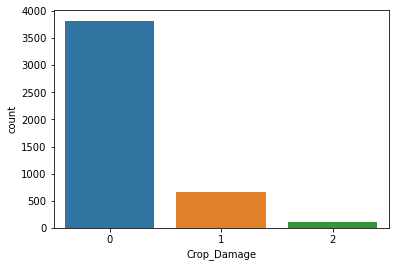

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


In [13]:
#counts of damage types
plt.figure()
sns.countplot(x='Crop_Damage',data=ds)
plt.show()
print(ds['Crop_Damage'].value_counts())

The maximum number of crops are healthy and the least are those damaged due to pesticides.

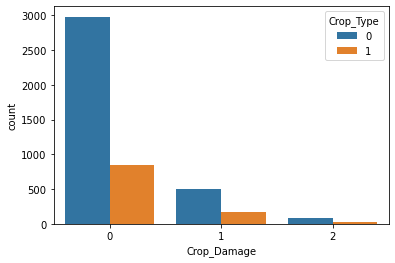

Crop_Damage  Crop_Type
0            0            2979
             1             841
1            0             498
             1             166
2            0              88
             1              27
Name: Crop_Type, dtype: int64


In [14]:
#crop type against crop damage
plt.figure()
sns.countplot(x='Crop_Damage',hue='Crop_Type',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Crop_Type'].value_counts())

The crop type 0 has the maximum count of healthy crops. Also crop type 0 is the most used type also. Also the damage due to pesticides is the least for both crop types.

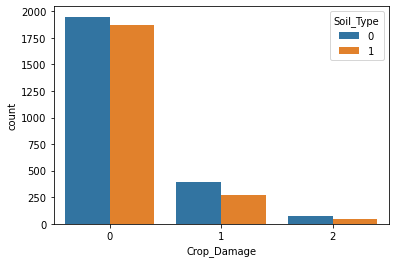

Crop_Damage  Soil_Type
0            0            1947
             1            1873
1            0             390
             1             274
2            0              70
             1              45
Name: Soil_Type, dtype: int64


In [15]:
#soil type against crop damage
plt.figure()
sns.countplot(x='Crop_Damage',hue='Soil_Type',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Soil_Type'].value_counts())

There isnt a large difference between the soil types in terms of healthy crops, though the maximum count is high for wealthy crops in soil type 0.

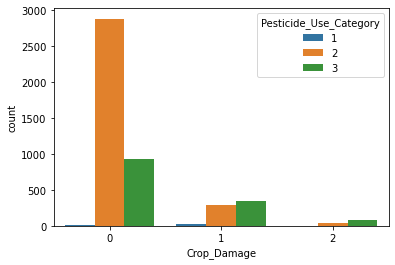

Crop_Damage  Pesticide_Use_Category
0            2                         2881
             3                          932
             1                            7
1            3                          341
             2                          290
             1                           33
2            3                           76
             2                           34
             1                            5
Name: Pesticide_Use_Category, dtype: int64


In [16]:
#crop damage vs pesticide category
plt.figure()
sns.countplot(x='Crop_Damage',hue='Pesticide_Use_Category',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Pesticide_Use_Category'].value_counts())

Previously used pesticides had a max count for wealthy crops. It is evident that although pesticides has been used more number of wealthy crops are seen. Those crops which are damaged due to pesticides have more count for the currently using pesticides.

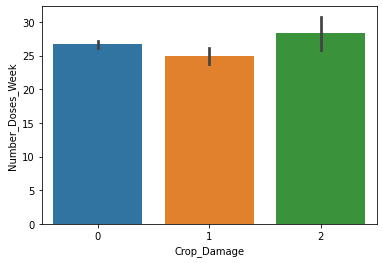

Crop_Damage
0    26.692408
1    24.902108
2    28.434783
Name: Number_Doses_Week, dtype: float64


In [17]:
#crop damage vs Number doses weeks
plt.figure()
sns.barplot(x='Crop_Damage',y='Number_Doses_Week',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Number_Doses_Week'].mean())

The average of number of doses per week is less in the case of damaged crops due to other reasons. 

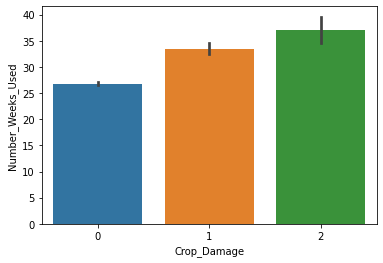

Crop_Damage
0    26.818586
1    33.475904
2    37.086957
Name: Number_Weeks_Used, dtype: float64


In [18]:
#crop damage vs Number_Weeks_Used
plt.figure()
sns.barplot(x='Crop_Damage',y='Number_Weeks_Used',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Number_Weeks_Used'].mean())

The number of weeks used is less in the case of healthy crops whereas it is more for crops damaged due to pesticides. This is evident that number of weeks used leads to more damages in crops. 

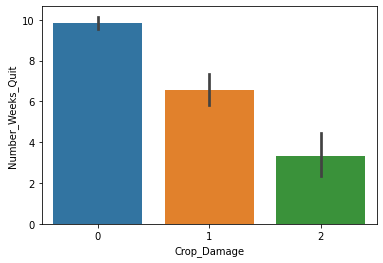

Crop_Damage
0    9.841885
1    6.558735
2    3.347826
Name: Number_Weeks_Quit, dtype: float64


In [19]:
#crop damage vs Number_Weeks_Quit
plt.figure()
sns.barplot(x='Crop_Damage',y='Number_Weeks_Quit',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Number_Weeks_Quit'].mean())

The number of weeks quit was high in the case of healthy crops whereas the lowest number of weeks quit lead to damage of crops due to pesticides.This shows the inverse relationship of weeks quit with the crop damage type, As it was quitted for more weeks the crop was healthy and when it was for less weeks the crop was damaged.

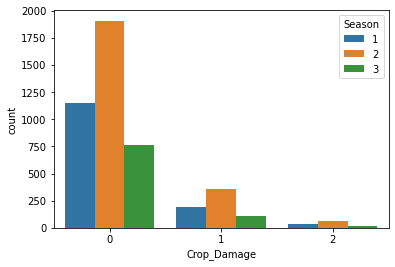

Crop_Damage  Season
0            2         1908
             1         1150
             3          762
1            2          358
             1          192
             3          114
2            2           61
             1           37
             3           17
Name: Season, dtype: int64


In [20]:
#season vs crop damage
plt.figure()
sns.countplot(x='Crop_Damage',hue='Season',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Season'].value_counts())

It is evident that in the 2 nd season most number of crops were sown. The 3rd season is having the least number of crops sown.


Lets check for outliers

In [21]:
#let us drop the id column since it has no relevance
ds.drop(columns='ID',axis=1,inplace=True)
ds

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,20.0,1,1,1
4595,2139,0,1,2,30,47.0,2,1,1
4596,2267,0,1,2,10,7.0,27,2,0
4597,2267,0,1,2,10,20.0,24,2,0


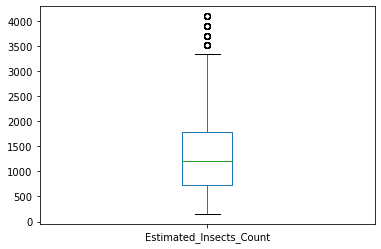

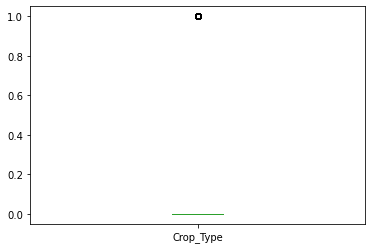

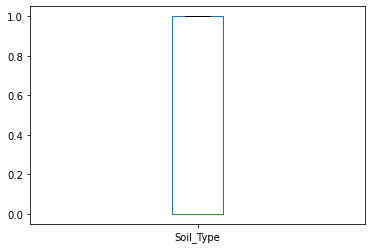

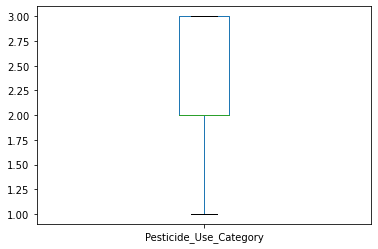

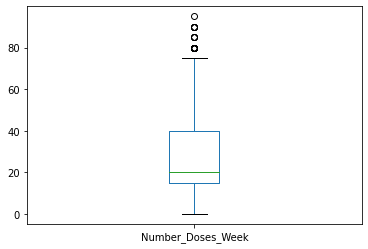

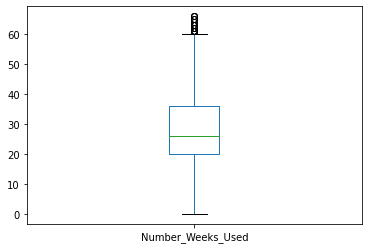

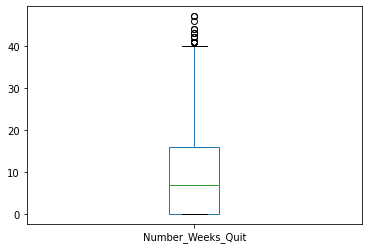

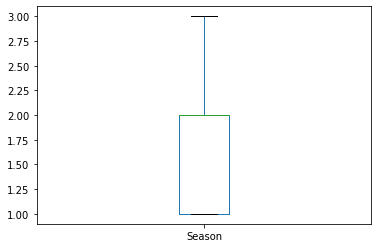

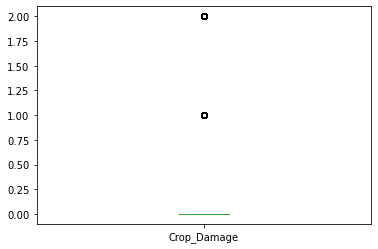

In [22]:
# using boxplot
plt.figure()
for i in ds.columns:
    ds[i].plot.box()
    plt.show()    

They are not outlier datas.Hence we cannot treat them because while treating we get to omit all of our crop_damage type 2 datas.

In [23]:
#lets check for skewness
ds.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.432681
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

Since most of the datas are categorical ones treating skewness for them is not ideal.

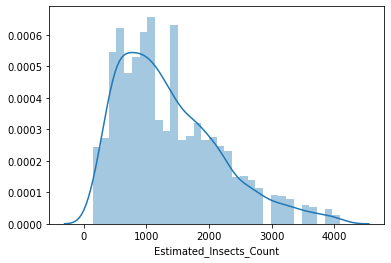

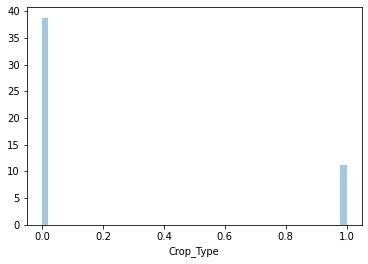

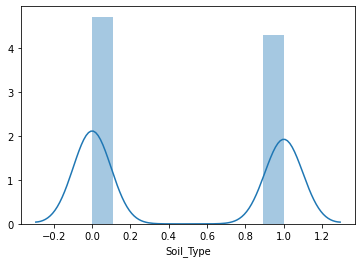

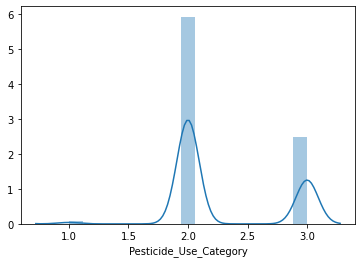

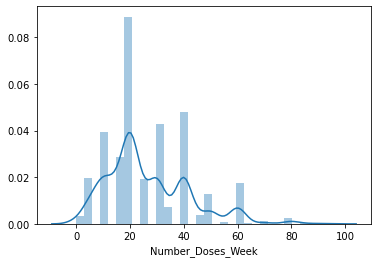

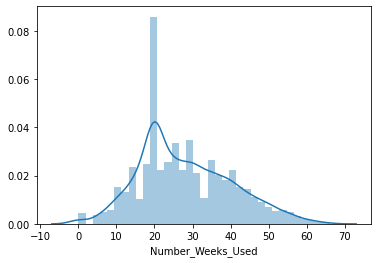

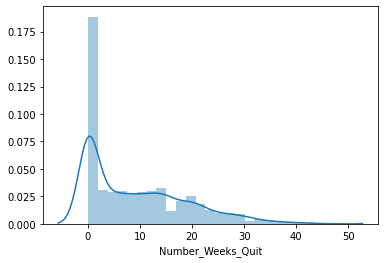

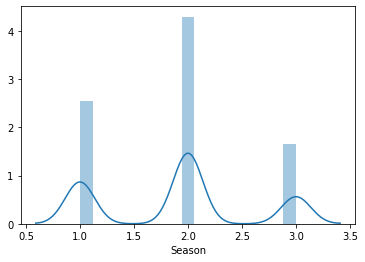

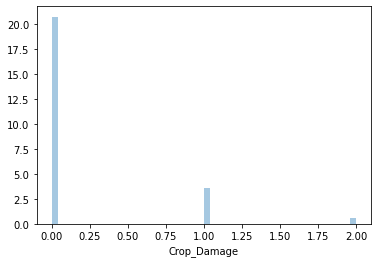

In [24]:
#lets visualise graphically
for i in ds.columns:
    plt.figure()
    sns.distplot(ds[i])
    plt.show()

In [25]:
list=['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Quit']
for i in list:
    ds[i]=np.sqrt(ds[i])

In [26]:
ds.skew()

Estimated_Insects_Count    0.257248
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week         -0.002742
Number_Weeks_Used          0.432681
Number_Weeks_Quit          0.054299
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

skewness is reduced to an extent.

## Training the model

In [27]:
y=ds['Crop_Damage']
y

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4599, dtype: int64

In [28]:
ds_x=ds.drop(columns='Crop_Damage',axis=1)
ds_x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,13.711309,1,0,1,0.000000,0.0,0.000000,1
1,14.456832,1,0,1,0.000000,0.0,0.000000,2
2,16.031220,1,0,1,0.000000,0.0,0.000000,2
3,16.031220,1,1,1,0.000000,0.0,0.000000,2
4,18.493242,1,0,1,0.000000,0.0,0.000000,2
...,...,...,...,...,...,...,...,...
4594,46.238512,0,1,2,4.472136,20.0,1.000000,1
4595,46.249324,0,1,2,5.477226,47.0,1.414214,1
4596,47.613023,0,1,2,3.162278,7.0,5.196152,2
4597,47.613023,0,1,2,3.162278,20.0,4.898979,2


In [29]:
#Now we apply Standard Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)

In [30]:
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-1.972553,1.856819,-0.954294,-2.719788,-3.191182,-2.289051,-1.212439,-1.287027
1,-1.904323,1.856819,-0.954294,-2.719788,-3.191182,-2.289051,-1.212439,0.152078
2,-1.760237,1.856819,-0.954294,-2.719788,-3.191182,-2.289051,-1.212439,0.152078
3,-1.760237,1.856819,1.047895,-2.719788,-3.191182,-2.289051,-1.212439,0.152078
4,-1.534916,1.856819,-0.954294,-2.719788,-3.191182,-2.289051,-1.212439,0.152078
...,...,...,...,...,...,...,...,...
4594,1.004300,-0.538556,1.047895,-0.600814,-0.284696,-0.656145,-0.694444,-1.287027
4595,1.005289,-0.538556,1.047895,-0.600814,0.368521,1.548278,-0.479883,-1.287027
4596,1.130094,-0.538556,1.047895,-0.600814,-1.135986,-1.717534,1.479145,0.152078
4597,1.130094,-0.538556,1.047895,-0.600814,-1.135986,-0.656145,1.325210,0.152078


In [31]:
#splitting the input and target variable into test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=47)
print(x_train.shape,'\t',x_test.shape)
print(y_train.shape,'\t',y_test.shape)

(3219, 8) 	 (1380, 8)
(3219,) 	 (1380,)


In [32]:
#importing libraries for models and error metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
#creating a for loop for all the models
model=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier()]
for m in model:
    m.fit(x_train,y_train)
    print('score of ',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Metrics:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Confusion Matrix:',confusion_matrix(y_test,predm))
    print('Classification Report:',classification_report(y_test,predm))
    print('END OF THE MODEL----------------------------------- ')
    print('\n')

score of  LogisticRegression() is: 0.8303821062441752
Metrics:
Accuracy Score: 0.8195652173913044
Confusion Matrix: [[1126   14    0]
 [ 194    5    0]
 [  37    4    0]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.99      0.90      1140
           1       0.22      0.03      0.05       199
           2       0.00      0.00      0.00        41

    accuracy                           0.82      1380
   macro avg       0.35      0.34      0.32      1380
weighted avg       0.72      0.82      0.75      1380

END OF THE MODEL----------------------------------- 


score of  KNeighborsClassifier() is: 0.8574091332712023
Metrics:
Accuracy Score: 0.8159420289855073
Confusion Matrix: [[1085   53    2]
 [ 157   41    1]
 [  29   12    0]]
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1140
           1       0.39      0.21      0.27       199
           

## Ensemble Methods

In [34]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
#by using loop
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    print('score of ',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Metrics:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Confusion Matrix:',confusion_matrix(y_test,predm))
    print('Classification Report:',classification_report(y_test,predm))
    print('END OF THE MODEL----------------------------------- ')
    print('\n')

score of  RandomForestClassifier() is: 0.9981360671015843
Metrics:
Accuracy Score: 0.8202898550724638
Confusion Matrix: [[1093   45    2]
 [ 161   37    1]
 [  25   14    2]]
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1140
           1       0.39      0.19      0.25       199
           2       0.40      0.05      0.09        41

    accuracy                           0.82      1380
   macro avg       0.55      0.40      0.41      1380
weighted avg       0.77      0.82      0.79      1380

END OF THE MODEL----------------------------------- 


score of  AdaBoostClassifier() is: 0.8313140726933831
Metrics:
Accuracy Score: 0.8289855072463768
Confusion Matrix: [[1125   15    0]
 [ 180   19    0]
 [  34    7    0]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1140
           1       0.46      0.10      0.16       199
         

Of all the above models Gradient boosting classifier has the highest accuracy score.lets check the cross validation score.

In [36]:
#Gradient Boosting classifier model
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
print('score:',gbc.score(x_train,y_train))
predgbc=gbc.predict(x_test)
print('\n')
print('Accuracy Score:',accuracy_score(y_test,predgbc))
print('Confusion Matrix:',confusion_matrix(y_test,predgbc))
print('Classification Report:',classification_report(y_test,predgbc))

score: 0.8614476545511028


Accuracy Score: 0.8297101449275363
Confusion Matrix: [[1113   27    0]
 [ 167   32    0]
 [  28   13    0]]
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1140
           1       0.44      0.16      0.24       199
           2       0.00      0.00      0.00        41

    accuracy                           0.83      1380
   macro avg       0.43      0.38      0.38      1380
weighted avg       0.77      0.83      0.79      1380



In [37]:
#cross validating Gradient Boosting classifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(gbc,x,y,cv=10,scoring='accuracy')
print('Score:',score)
print('Mean Score:',score.mean())
print('Standard Deviation:',score.std())

Score: [0.72608696 0.81304348 0.78043478 0.83478261 0.75652174 0.84130435
 0.76956522 0.83043478 0.7673913  0.83224401]
Mean Score: 0.7951809226105901
Standard Deviation: 0.03813872872072989


The Gradient Boosting Classifier model is performing well with a mean cross validation score of 0.84 . The model is well fit for this dataset and can be considered as the best model for future predictions.

## Testing dataset

In [38]:
ds_test=pd.read_csv('test_agriculture.csv')
ds_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [39]:
#check for missing datas
ds_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [40]:
#replace the missing values with the previously found mode value -20
ds_test.replace(np.nan,20,inplace=True)

In [41]:
#drop the id column
ds_test.drop(columns='ID',axis=1,inplace=True)

In [42]:
#we have to perform standard scaling
X=sc.transform(ds_test)
X=pd.DataFrame(X,columns=ds_test.columns)

In [43]:
X

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,13.978151,1.856819,1.047895,-2.719788,-3.191182,-0.656145,-1.212439,0.152078
1,34.295339,1.856819,1.047895,-2.719788,-3.191182,-2.289051,-1.212439,0.152078
2,54.063414,1.856819,-0.954294,-2.719788,-3.191182,-2.289051,-1.212439,0.152078
3,63.672895,1.856819,-0.954294,-2.719788,-3.191182,-2.289051,-1.212439,0.152078
4,68.980989,-0.538556,-0.954294,-2.719788,-3.191182,-2.289051,-1.212439,-1.287027
...,...,...,...,...,...,...,...,...
1194,100.371960,-0.538556,1.047895,-0.600814,22.805214,0.486889,2.413530,1.591182
1195,100.371960,-0.538556,1.047895,-0.600814,22.805214,-0.247918,0.341548,-1.287027
1196,100.371960,-0.538556,1.047895,-0.600814,9.807016,-1.227662,10.701459,-1.287027
1197,107.693470,-0.538556,1.047895,-0.600814,3.307917,0.568535,1.377539,-1.287027


In [44]:
#predicting the output
Predictgbc=gbc.predict(X)

In [45]:
#predicted output
pd.DataFrame(Predictgbc)

,0
0,1
1,1
2,1
3,1
4,1
...,...
1194,1
1195,1
1196,1
1197,1


## Saving the model and result

In [46]:
#saving the GBC model
import joblib
joblib.dump(gbc,'Agriculture.pkl')

['Agriculture.pkl']

In [47]:
#saving the output to csv file
pred_OP=pd.DataFrame(Predictgbc)
pred_OP.to_csv('Agriculture_crop_damage_predictions.csv')